In [1]:
from wordle_agnostic import wordle_blitz
import shelve
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

shelfFile = shelve.open('five_words')
five_words1 = shelfFile['five_words2']
database = shelfFile['blank_db']
print(len(five_words1))


4738


In [2]:
database[database['Number Wrong']>0].head()

,Number Wrong,Percent Missed,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Guesses,Pattern
Word,,,,,,,,,,


In [3]:
db = wordle_blitz(1000, five_words1)

0
100
200
300
cower
['greek', 'wires', 'newer', 'mower', 'tower', 'dower']
400
500
600
700
faded
['doles', 'raped', 'mated', 'faced', 'fazed', 'faked']
800
900
1000
Correct tries: 934
Incorrect tries: 66
Percent correct: 93.40%
Correct answers per round:
Round 4: 342
Round 5: 258
Round 6: 122


In [6]:
db_wrong = db[db['Number Wrong'] >0]

In [53]:
db_wrong.sort_values('Number Wrong', ascending = False).head()

,Tries,Number Wrong,Percent Missed,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Guesses,Pattern,Two Letters,Brick,Stomp,Nudge
Word,,,,,,,,,,,,,,,
lames,3,2,66.666667,0,0,0,0,0,0,[],[],False,bbbbb,ybbyb,bbbby
poses,2,2,100.000000,0,0,0,0,0,0,[],[],True,bbbbb,ybyby,bbbby
abode,1,1,100.000000,0,0,0,0,0,0,[],[],False,ybbbb,bbgbb,bbybg
lazed,1,1,100.000000,0,0,0,0,0,0,[],[],False,bbbbb,bbbbb,bbyby
maces,1,1,100.000000,0,0,0,0,0,0,[],[],False,bbbyb,ybbyb,bbbby


In [8]:
word_to_wrong_map = dict(zip(db_wrong.index.values, db_wrong['Number Wrong']))

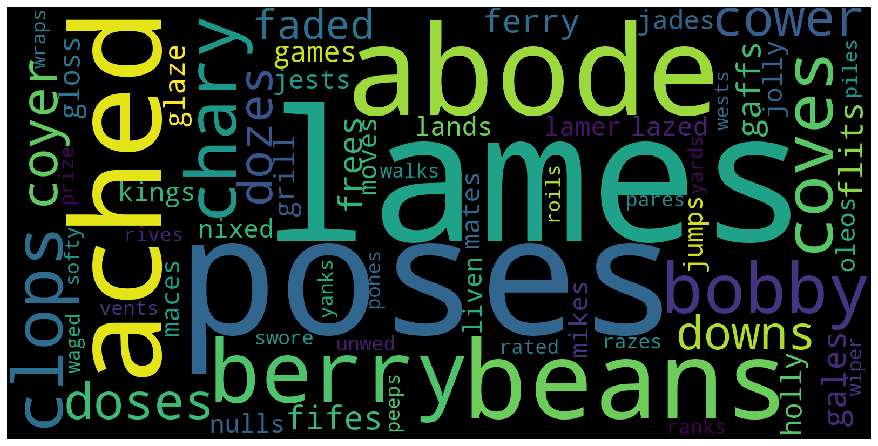

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tupl = dict(word_to_wrong_map.items())
word_cloud = WordCloud(width=1600,height=800,).generate_from_frequencies(tupl)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

In [10]:
alph = 'abcdefghijklmnopqrstuvwxyz'

a_list = []
for let in alph:
    a_list.append(let)

count_list = []

for letter in alph:
    letter_count = 0
    for word in db_wrong.index.values:
        if letter in word:
            letter_count +=1
    count_list.append(letter_count)

In [11]:
df_letters = pd.DataFrame()
df_letters['Letter'] = a_list
df_letters['Count'] = count_list
df_letters = df_letters.sort_values(by = ['Count'], ascending = False)

Text(0, 0.5, 'Percent Wrong')

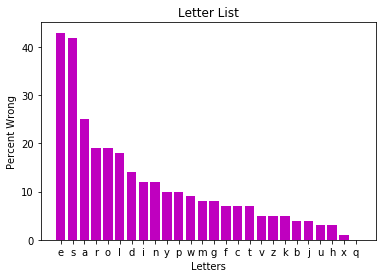

In [12]:
plt.bar(x = df_letters['Letter'], height = df_letters['Count'], color = ['m'])
plt.title("Letter List")
plt.xlabel('Letters')
plt.ylabel("Percent Wrong")

Percent wrong with two letters vs percent wrong total

percent of five letter words where 2 letters are the same

In [13]:
pertwotot = db[db['Two Letters'] == True].shape[0]/db.shape[0]

In [14]:
pertwowr = db_wrong[db_wrong['Two Letters'] == True].shape[0]/db_wrong.shape[0]

In [15]:
df_tl = pd.DataFrame()
df_tl['Name'] = ['Percent with two letters total', 'Percent with two letters wrong']
df_tl['Percent Wrong'] = [pertwotot, pertwowr]


Text(0, 0.5, 'Percent of total words')

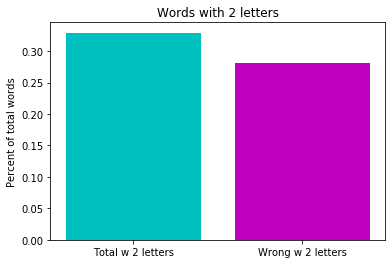

In [16]:
plt.bar(x = ['Total w 2 letters', 'Wrong w 2 letters'], height = df_tl['Percent Wrong'], color = ['c','m'])
plt.title("Words with 2 letters")
plt.ylabel("Percent of total words")

words that end in 's'

Total words ending in 's': 0.3224989447024061
Wrong words ending in 's': 0.625


Text(0, 0.5, 'Percent of total words')

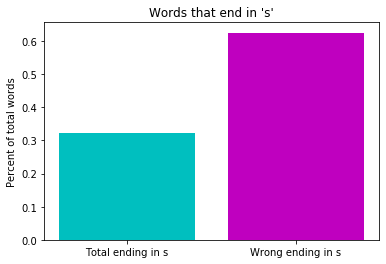

In [17]:
swords1 = 0

for word in db.index.values:
        if word[4] == 's':
            swords1 +=1

swords2 = 0

for word in db_wrong.index.values:
        if word[4] == 's':
            swords2 +=1
ends_tot = swords1/len(db.index.values)
ends_wr = swords2/len(db_wrong.index.values)

print("Total words ending in 's': " + str(ends_tot))
print("Wrong words ending in 's': " + str(ends_wr))
plt.bar(x = ['Total ending in s', 'Wrong ending in s'], height = [ends_tot, ends_wr], color = ['c','m'])
plt.title("Words that end in 's'")
plt.ylabel("Percent of total words")

vowel placement

In [18]:
a_list = [0,0,0,0,0]
e_list = [0,0,0,0,0]
i_list = [0,0,0,0,0]
o_list = [0,0,0,0,0]
u_list = [0,0,0,0,0]


for word in db.index.values:
    for i in range(0,5):
        if word[i] == 'a':
            a_list[i] +=1
        if word[i] == 'e':
            e_list[i] +=1
        if word[i] == 'i':
            i_list[i] +=1
        if word[i] == 'o':
            o_list[i] +=1
        if word[i] == 'u':
            u_list[i] +=1

print(a_list)
print(e_list)
print(i_list)
print(o_list)
print(u_list)

[251, 779, 542, 285, 129]
[113, 543, 334, 1010, 539]
[64, 531, 469, 248, 28]
[87, 722, 403, 210, 92]
[48, 420, 278, 126, 7]


In [19]:
vow_list = [0,0,0,0,0]

for i in range(0,5):
    vow_list[i] = a_list[i] + e_list[i] + i_list[i] + o_list[i] + u_list[i]  
    
print(vow_list)

[563, 2995, 2026, 1879, 795]


This actually gives no useful info. Let me try again.

most common vowel distributions.

In [20]:
vdist_list = []
for word in db.index.values:
    vowel_list = ['_','_','_','_','_']
    for i in range(0,5):
        if word[i] in 'aeiou':
            vowel_list[i] = word[i]
    vowel_list = ''.join(vowel_list)
    vdist_list.append(vowel_list)
    

In [21]:
vd_set = set(vdist_list)
vd_count = []
for i in vd_set:
    vd_count.append(vdist_list.count(i))

In [22]:
vd_count

[9,
 2,
 1,
 56,
 8,
 2,
 2,
 8,
 1,
 2,
 1,
 1,
 10,
 6,
 10,
 1,
 3,
 21,
 1,
 40,
 37,
 4,
 4,
 1,
 2,
 21,
 2,
 1,
 2,
 8,
 5,
 1,
 7,
 1,
 14,
 2,
 2,
 6,
 15,
 3,
 1,
 4,
 12,
 1,
 1,
 3,
 87,
 189,
 1,
 22,
 1,
 7,
 14,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 2,
 1,
 4,
 1,
 6,
 10,
 1,
 1,
 8,
 1,
 19,
 2,
 7,
 2,
 4,
 3,
 15,
 1,
 18,
 3,
 1,
 5,
 34,
 101,
 1,
 60,
 1,
 6,
 7,
 4,
 3,
 1,
 4,
 1,
 2,
 1,
 3,
 24,
 3,
 1,
 2,
 12,
 1,
 1,
 178,
 1,
 178,
 2,
 3,
 25,
 1,
 209,
 1,
 4,
 1,
 3,
 2,
 3,
 5,
 20,
 12,
 1,
 2,
 1,
 1,
 8,
 1,
 1,
 4,
 1,
 44,
 1,
 3,
 1,
 2,
 1,
 2,
 9,
 3,
 2,
 14,
 2,
 2,
 231,
 12,
 5,
 1,
 12,
 2,
 1,
 1,
 68,
 4,
 17,
 12,
 2,
 18,
 2,
 1,
 2,
 10,
 3,
 1,
 16,
 2,
 1,
 1,
 4,
 121,
 20,
 1,
 9,
 3,
 6,
 1,
 2,
 1,
 1,
 1,
 4,
 12,
 1,
 12,
 1,
 1,
 1,
 1,
 21,
 68,
 5,
 1,
 1,
 10,
 5,
 46,
 36,
 1,
 1,
 2,
 13,
 1,
 2,
 2,
 1,
 2,
 5,
 4,
 4,
 2,
 1,
 1,
 7,
 149,
 1,
 1,
 4,
 3,
 1,
 14,
 18,
 3,
 2,
 1,
 1,
 20,
 1,
 25,
 1,
 10,
 7,


In [23]:
vow_dist_map = dict(zip(vd_set, vd_count))

In [24]:
list = []
for key, value in vow_dist_map.items():
  list.append([key, value]) 

In [25]:
print(len(two_letters))

4738


In [26]:
vow_df = pd.DataFrame(list, columns=['Vowel Dist', 'Counts'])
vow_df.head()

,Vowel Dist,Counts
0,_ue__,9
1,o_e_e,2
2,a__ee,1
3,_ou__,56
4,_u__a,8


In [27]:
vow_df = vow_df.sort_values('Counts', ascending = False)
vow_df_shrink = vow_df.iloc[:10,:]
print()

In [28]:
vow_df_shrink['Counts'].sum()

1807

Text(0, 0.5, 'Percent of total words')

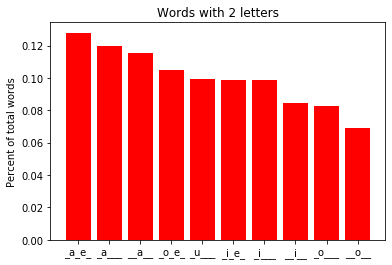

In [29]:
plt.bar(x = vow_df_shrink['Vowel Dist'], height = vow_df_shrink['Counts']/vow_df_shrink['Counts'].sum(), color = ['r'])
plt.title("Words with 2 letters")
plt.ylabel("Percent of total words")

In [30]:
vow_df_shrink[vow_df_shrink['Vowel Dist'] == '_ee__']

,Vowel Dist,Counts


[2, 19, 4, 0, 0]
[0, 7, 3, 31, 4]
[0, 8, 4, 0, 0]
[1, 14, 4, 1, 0]
[1, 2, 0, 0, 0]
[4, 50, 15, 32, 4]
4738



Text(0, 0.5, 'Percent of total words')

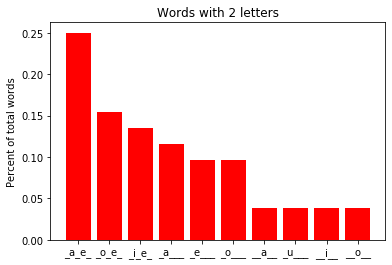

In [31]:
a_list = [0,0,0,0,0]
e_list = [0,0,0,0,0]
i_list = [0,0,0,0,0]
o_list = [0,0,0,0,0]
u_list = [0,0,0,0,0]


for word in db_wrong.index.values:
    for i in range(0,5):
        if word[i] == 'a':
            a_list[i] +=1
        if word[i] == 'e':
            e_list[i] +=1
        if word[i] == 'i':
            i_list[i] +=1
        if word[i] == 'o':
            o_list[i] +=1
        if word[i] == 'u':
            u_list[i] +=1

print(a_list)
print(e_list)
print(i_list)
print(o_list)
print(u_list)

vow_list = [0,0,0,0,0]

for i in range(0,5):
    vow_list[i] = a_list[i] + e_list[i] + i_list[i] + o_list[i] + u_list[i]  
    
print(vow_list)

#This actually gives no useful info. Let me try again.

#most common vowel distributions.

vdist_list = []
for word in db_wrong.index.values:
    vowel_list = ['_','_','_','_','_']
    for i in range(0,5):
        if word[i] in 'aeiou':
            vowel_list[i] = word[i]
    vowel_list = ''.join(vowel_list)
    vdist_list.append(vowel_list)
    

vd_set = set(vdist_list)
vd_count = []
for i in vd_set:
    vd_count.append(vdist_list.count(i))

vd_count

vow_dist_map = dict(zip(vd_set, vd_count))

list = []
for key, value in vow_dist_map.items():
  list.append([key, value]) 

print(len(two_letters))

vow_df = pd.DataFrame(list, columns=['Vowel Dist', 'Counts'])
vow_df.head()

vow_df = vow_df.sort_values('Counts', ascending = False)
vow_df_shrink = vow_df.iloc[:10,:]
print()

plt.bar(x = vow_df_shrink['Vowel Dist'], height = vow_df_shrink['Counts']/vow_df_shrink['Counts'].sum(), color = ['r'])
plt.title("Words with 2 letters")
plt.ylabel("Percent of total words")

In [32]:
db_wrong.loc[:,'Number Wrong']

Word
abode    1
ached    1
beans    1
berry    1
bobby    1
        ..
wests    1
wiper    1
wraps    1
yanks    1
yards    1
Name: Number Wrong, Length: 64, dtype: int64

In [33]:
pattern_brick = {}
pattern_stomp = {}
pattern_nudge = {}
for word, row in db.iterrows():
    pattern1 = []
    pattern2 = []
    pattern3 = []
    for i in range(0,5):
        if word[i] == 'brick'[i]:
            pattern1.append('g')
        elif 'brick'[i] in word:
            pattern1.append('y')
        else:
            pattern1.append('b')
    for i in range(0,5):
        if word[i] == 'stomp'[i]:
            pattern2.append('g')
        elif 'stomp'[i] in word:
            pattern2.append('y')
        else:
            pattern2.append('b')
    for i in range(0,5):
        if word[i] == 'nudge'[i]:
            pattern3.append('g')
        elif 'nudge'[i] in word:
            pattern3.append('y')
        else:
            pattern3.append('b')
    pattern_brick[word] = "".join(pattern1)
    pattern_stomp[word] = "".join(pattern2)
    pattern_nudge[word] = "".join(pattern3)
    


In [34]:
brick = []
for key in pattern_brick:
    brick.append(pattern_brick[key])
    
stomp = []
for key in pattern_stomp:
    stomp.append(pattern_stomp[key])
    
nudge = []
for key in pattern_nudge:
    nudge.append(pattern_nudge[key])


In [35]:
db['Brick'] = brick
db['Stomp'] = stomp
db['Nudge'] = nudge


In [36]:
def num_of_patterns(database, word):
    pattern_list = []
    for i in database[word]:
        pattern_list.append(i)
    pattern_set = set()
    for i in pattern_list:
        pattern_set.add(i)
    pattern_set

In [37]:
num_of_patterns(db, 'Brick')

In [38]:
db_wrong = db[db['Number Wrong'] > 0]

In [39]:
num_of_patterns(db_wrong, 'Brick')

In [40]:
num_of_patterns(db, 'Stomp')

In [41]:
num_of_patterns(db_wrong, 'Stomp')

In [42]:
num_of_patterns(db, 'Nudge')

In [43]:
nudge_patterns = num_of_patterns(db_wrong, 'Nudge')

In [44]:
nudge_patterns

Ok, so it looks like there are 98 possible layouts for the pattern returned on the first word. Only 13 of those patterns lead to a possible error.


How many words are in one of the init patterns that can lead to a wrong answer, but never do lead to a wrong answer?

In [45]:
db_new = db[db['Number Wrong'] == 0]

In [46]:
db_new = db[db['Nudge'].isin(['bbbyy', 'yybbb', 'bbbbg', 'bbbby', 'ybyby', 'bgbby', 'ybbyb', 'bbbyb', 'bgbbb', 'ybbby', 'ybbbb', 'bbybb', 'bbgby', 'bbyby'])]

In [47]:
db_new.shape

(2587, 15)

In [48]:
db_new1 = db[~db['Nudge'].isin(['bbbyy', 'yybbb', 'bbbbg', 'bbbby', 'ybyby', 'bgbby', 'ybbyb', 'bbbyb', 'bgbbb', 'ybbby', 'ybbbb', 'bbybb', 'bbgby', 'bbyby'])]

In [49]:
db_new1.shape

(2151, 15)

In [50]:
db_nudge = db[(db['Number Wrong'] > 0) & (db['Nudge'] == 'bbbyy')]

In [51]:
for i in db_wrong

SyntaxError: invalid syntax (<ipython-input-51-9ca9b628189b>, line 1)

In [ ]:
db[db['Nudge'] == 'bbbyy']

In [ ]:
wl = []
for i in db[db['Nudge'] == 'bbbyy'].index:
    wl.append(i)

In [ ]:
db = wordle_blitz('brick','stomp','nudge', 10000, wl)

In [ ]:
db = wordle_blitz('brick','halos','nudge', 10000, wl)

In [ ]:
pattern_brick = {}
pattern_stomp = {}
pattern_nudge = {}
for word, row in db.iterrows():
    pattern1 = []
    pattern2 = []
    pattern3 = []
    for i in range(0,5):
        if word[i] == 'brick'[i]:
            pattern1.append('g')
        elif 'brick'[i] in word:
            pattern1.append('y')
        else:
            pattern1.append('b')
    for i in range(0,5):
        if word[i] == 'stomp'[i]:
            pattern2.append('g')
        elif 'stomp'[i] in word:
            pattern2.append('y')
        else:
            pattern2.append('b')
    for i in range(0,5):
        if word[i] == 'nudge'[i]:
            pattern3.append('g')
        elif 'nudge'[i] in word:
            pattern3.append('y')
        else:
            pattern3.append('b')
    pattern_brick[word] = "".join(pattern1)
    pattern_stomp[word] = "".join(pattern2)
    pattern_nudge[word] = "".join(pattern3)

In [ ]:
for i in nudge_patterns:
    print(

In [ ]:
db[db['Nudge'] == 'bbbyy'][['Percent Missed']].mean()